__Goal:__ is to estimate the future Petrol Price. To do this, please follow the following steps

### Import the libraries

In [ ]:
conda install tensorflow

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
#import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
fuel= pd.read_excel('Weekly Fuel Prices.xlsx')
fuel

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376
...,...,...,...
878,2020-04-06 00:00:00,110.234797,116.833354
879,2020-04-13 00:00:00,109.265819,116.150812
880,2020-04-20 00:00:00,108.632747,115.732573
881,NaN,NaN,NaN


__Q1)__ Look at the information about the data? Prepare your data for exploring more as time series?-10 points

In [3]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          882 non-null    object 
 1   Petrol (USD)  881 non-null    float64
 2   Diesel (USD)  881 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.8+ KB


In [4]:
fuel.dtypes

Date             object
Petrol (USD)    float64
Diesel (USD)    float64
dtype: object

In [5]:
fuel.shape

(883, 3)

In [6]:
fuel.isna()

,Date,Petrol (USD),Diesel (USD)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
878,False,False,False
879,False,False,False
880,False,False,False
881,True,True,True


In [7]:
from datetime import datetime

#to convert date column to datetime
fuel['Date'] = pd.to_datetime(fuel['Date'], errors='coerce')
fuel['Date']

0     2003-06-09
1     2003-06-16
2     2003-06-23
3     2003-06-30
4     2003-07-07
         ...    
878   2020-04-06
879   2020-04-13
880   2020-04-20
881          NaT
882          NaT
Name: Date, Length: 883, dtype: datetime64[ns]

In [8]:
#change date column to index
fuel_index = fuel.set_index(['Date', fuel.index])
fuel_index

,,Petrol (USD),Diesel (USD)
Date,,,
2003-06-09,0,74.590284,76.773394
2003-06-16,1,74.469143,76.689054
2003-06-23,2,74.423566,76.620546
2003-06-30,3,74.352421,76.505260
2003-07-07,4,74.283737,76.457376
...,...,...,...
2020-04-06,878,110.234797,116.833354
2020-04-13,879,109.265819,116.150812
2020-04-20,880,108.632747,115.732573


__Q2__ Compare the shape of your prepared dataframe? - 5 points

In [9]:
#either drop or fill
fuel.isna().sum()

Date            2
Petrol (USD)    2
Diesel (USD)    2
dtype: int64

In [10]:
fuel_redefined = fuel.dropna(how ='all')
fuel_redefined

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09,74.590284,76.773394
1,2003-06-16,74.469143,76.689054
2,2003-06-23,74.423566,76.620546
3,2003-06-30,74.352421,76.505260
4,2003-07-07,74.283737,76.457376
...,...,...,...
876,2020-03-23,119.644504,123.409485
877,2020-03-30,112.452709,118.597998
878,2020-04-06,110.234797,116.833354
879,2020-04-13,109.265819,116.150812


In [11]:
fuel_redefined.shape

(881, 3)

# The of fuel dataframe and fuel_redefined dataframe has different rows because i dropped the NaN values, hence the change in shape.

In [12]:
fuel_redefined.describe()

,Petrol (USD),Diesel (USD)
count,881.000000,881.000000
mean,111.107355,115.614675
std,18.588151,19.715905
min,74.206577,76.408120
25%,95.306029,98.513787
50%,114.782386,118.597998
75%,127.924651,132.872053
max,142.172754,148.037710


__Q3__ Plot the columns of the dataframe with respect to the 'Date' -10 points

Text(0, 0.5, 'petrol and diesel usage')

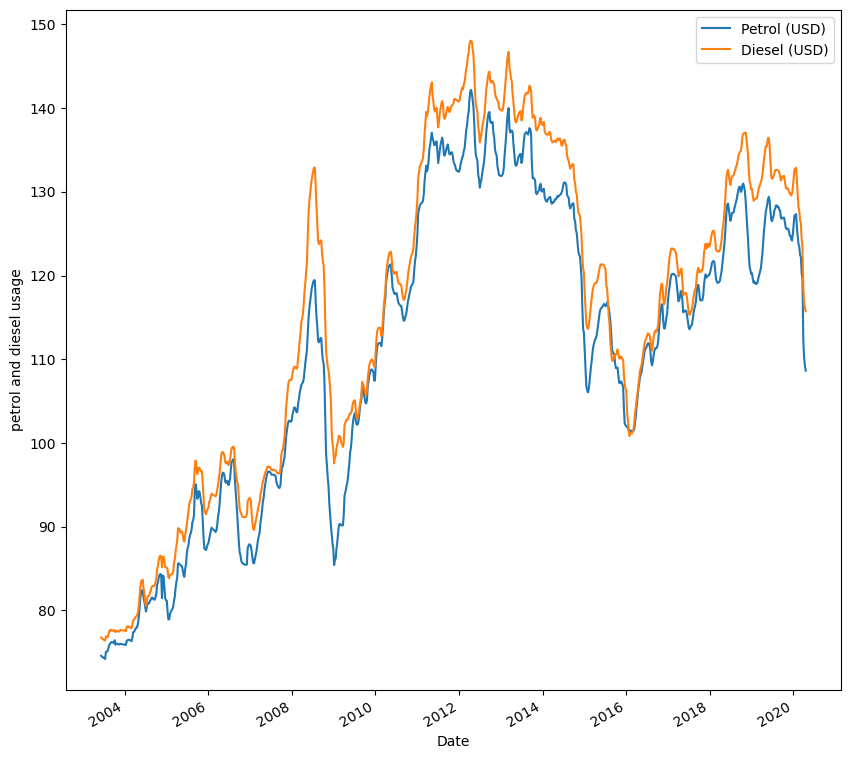

In [13]:
fuel_redefined.plot(x="Date", y=["Petrol (USD)", "Diesel (USD)"],
        kind="line", figsize=(10, 10))
plt.ylabel('petrol and diesel usage')

__Q4__ Decompose your data taking into account your purpose!: --5 points

* The correct choice of model (take period=7) --10 points

In [14]:
# To visualize the seanality & trendy &residuals & noisy kindness we utilize the seasonal_decompose()
# additive (linear) vs multiplicative (non-linear)
rcParams['figure.figsize'] = 18,8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result=seasonal_decompose(fuel_redefined['Petrol (USD)'], model='multiplicative', period = 7)

<Figure size 4000x1600 with 0 Axes>

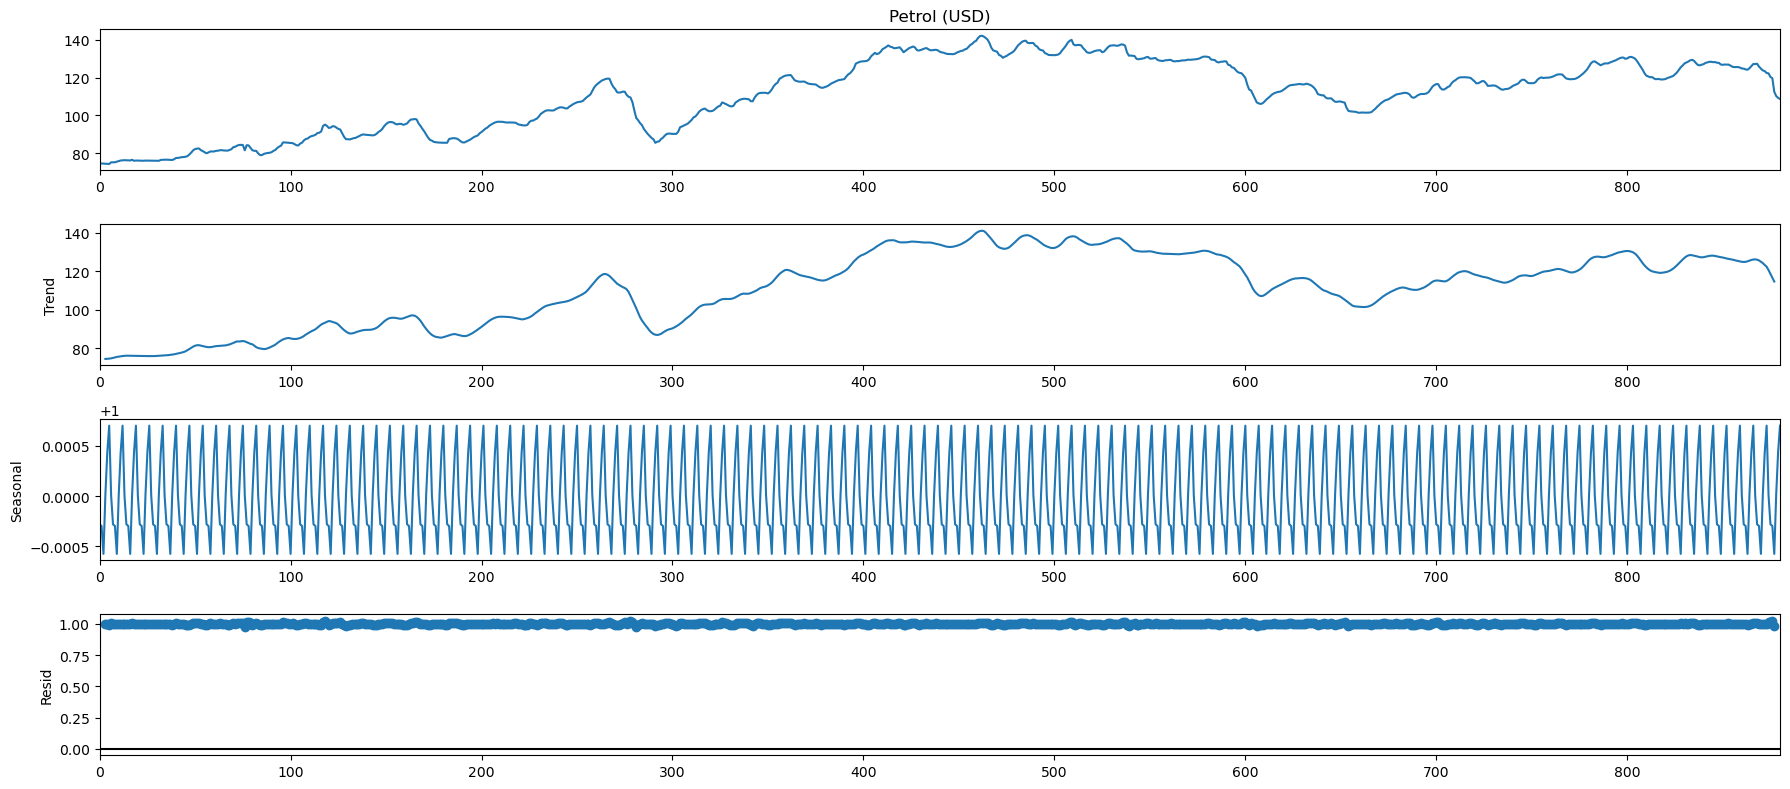

In [15]:
result_plot=result.plot()

In [16]:
rcParams['figure.figsize'] = 18,8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result=seasonal_decompose(fuel_redefined['Petrol (USD)'], model='additive', period = 7)

<Figure size 4000x1600 with 0 Axes>

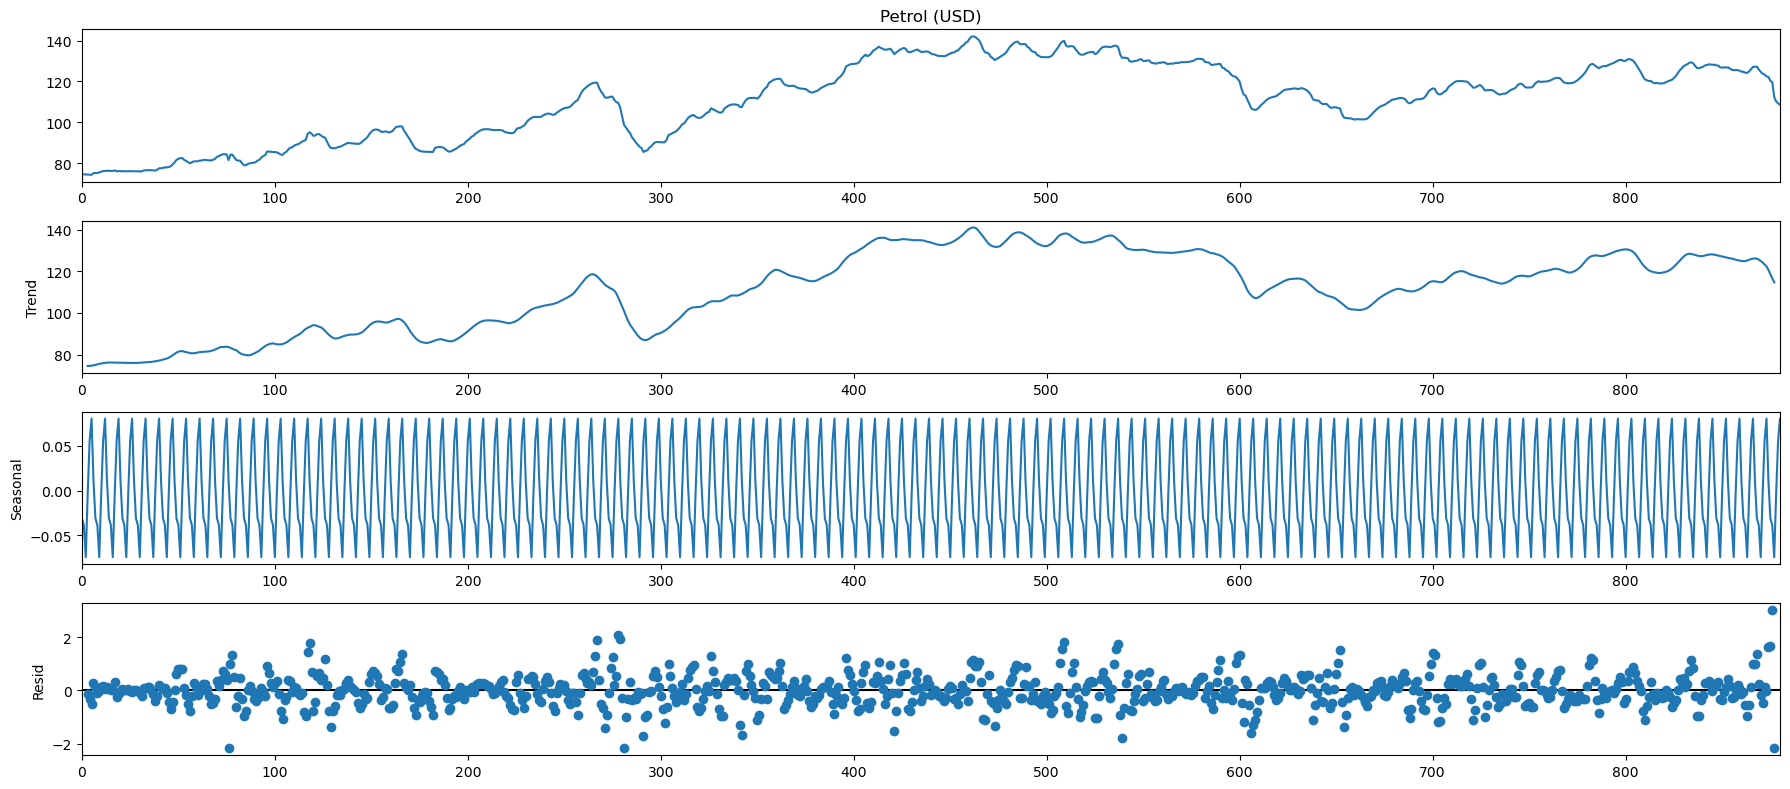

In [17]:
result_plot=result.plot()

In [18]:
rcParams['figure.figsize'] = 18,8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result1=seasonal_decompose(fuel_redefined['Diesel (USD)'], model='multiplicative', period = 7)

<Figure size 4000x1600 with 0 Axes>

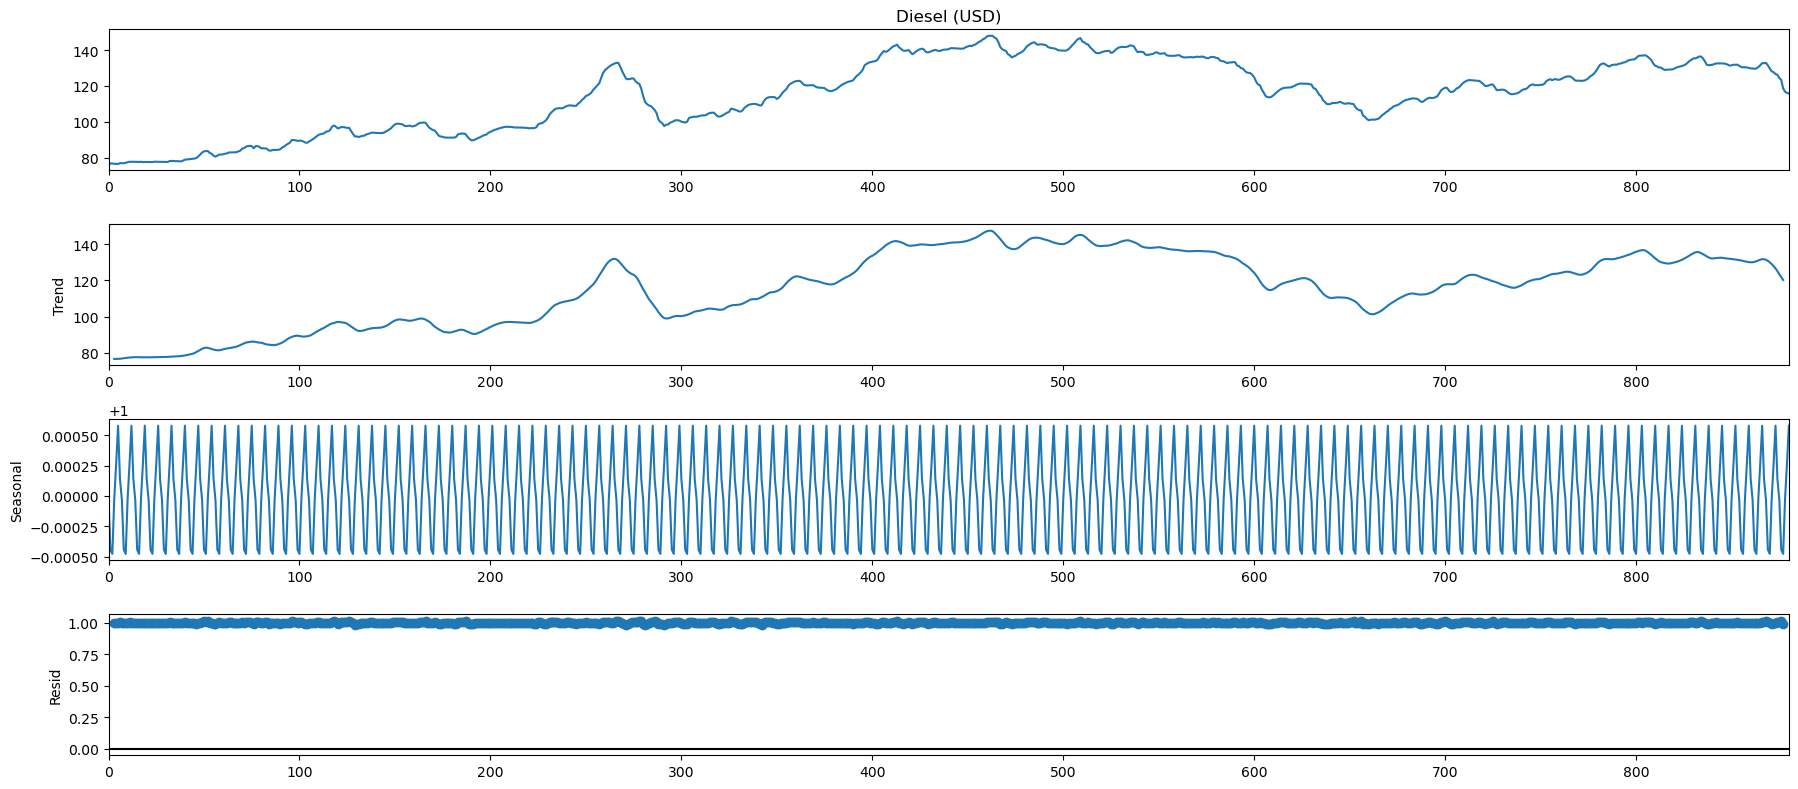

In [19]:
result1_plot=result1.plot()

In [20]:
rcParams['figure.figsize'] = 18,8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result1=seasonal_decompose(fuel_redefined['Diesel (USD)'], model='additive', period = 7)

<Figure size 4000x1600 with 0 Axes>

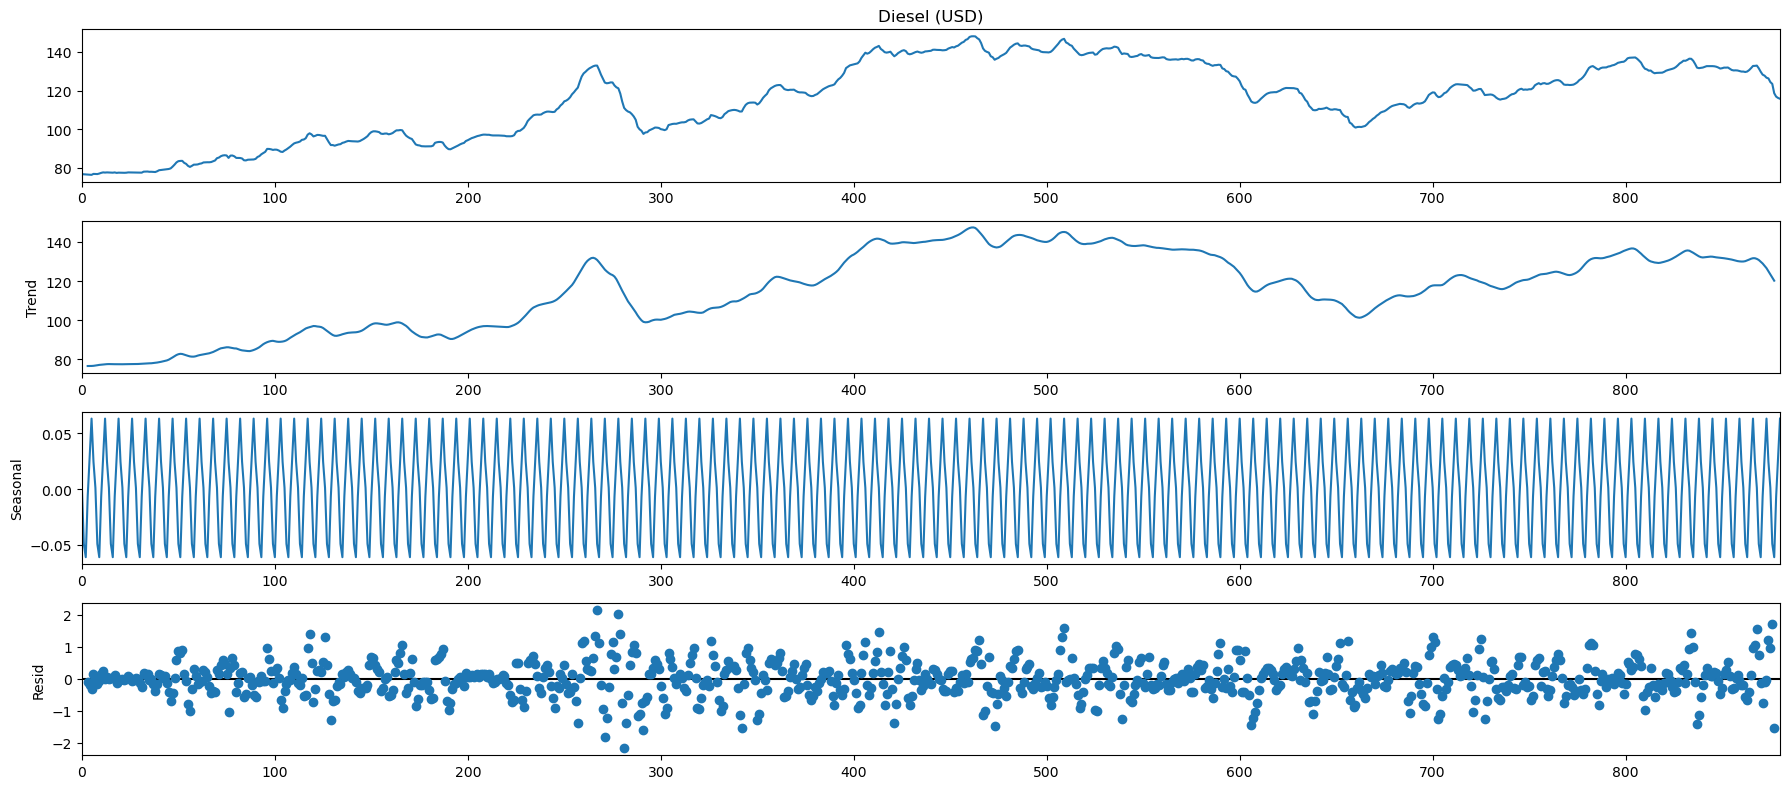

In [21]:
result1_plot=result1.plot()

__Q5__ Plot the seasonal component of the decomposed model? --5 points

<AxesSubplot:>

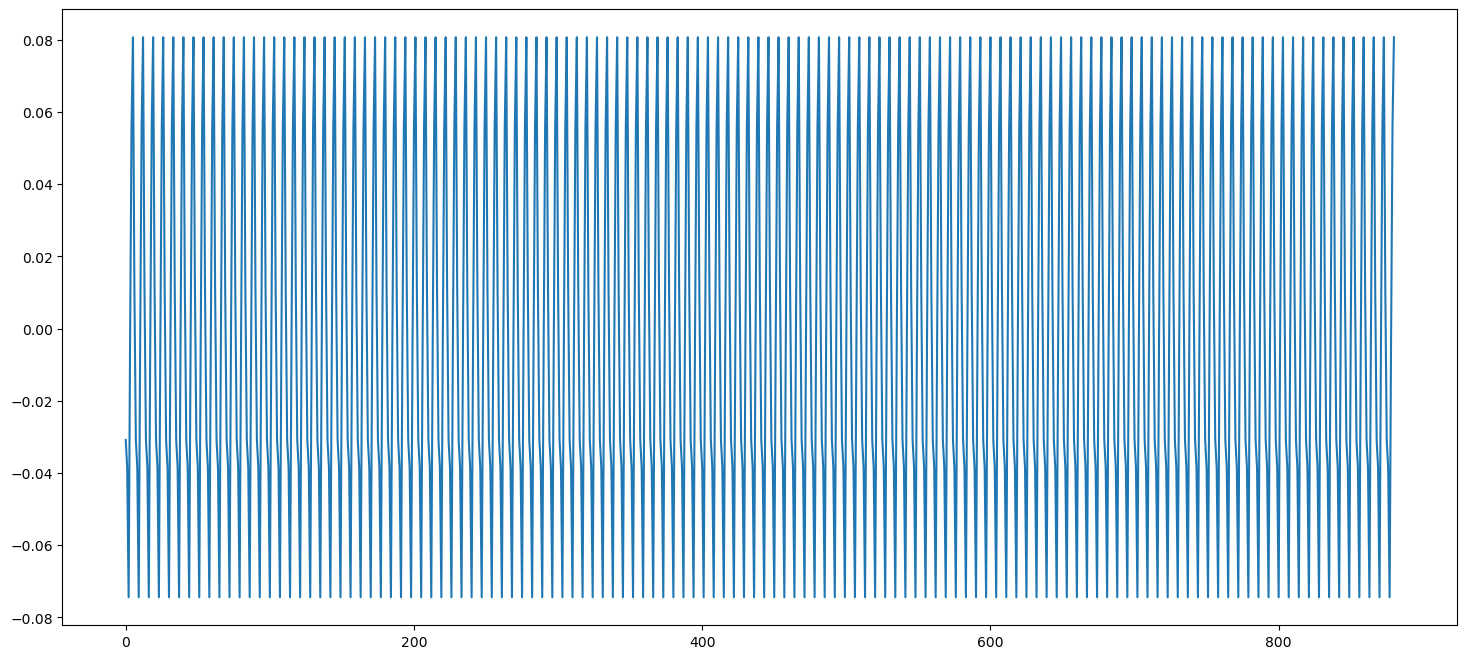

In [22]:
# the seasonal component of the decomposed model for petrol
result.seasonal.plot()

<AxesSubplot:>

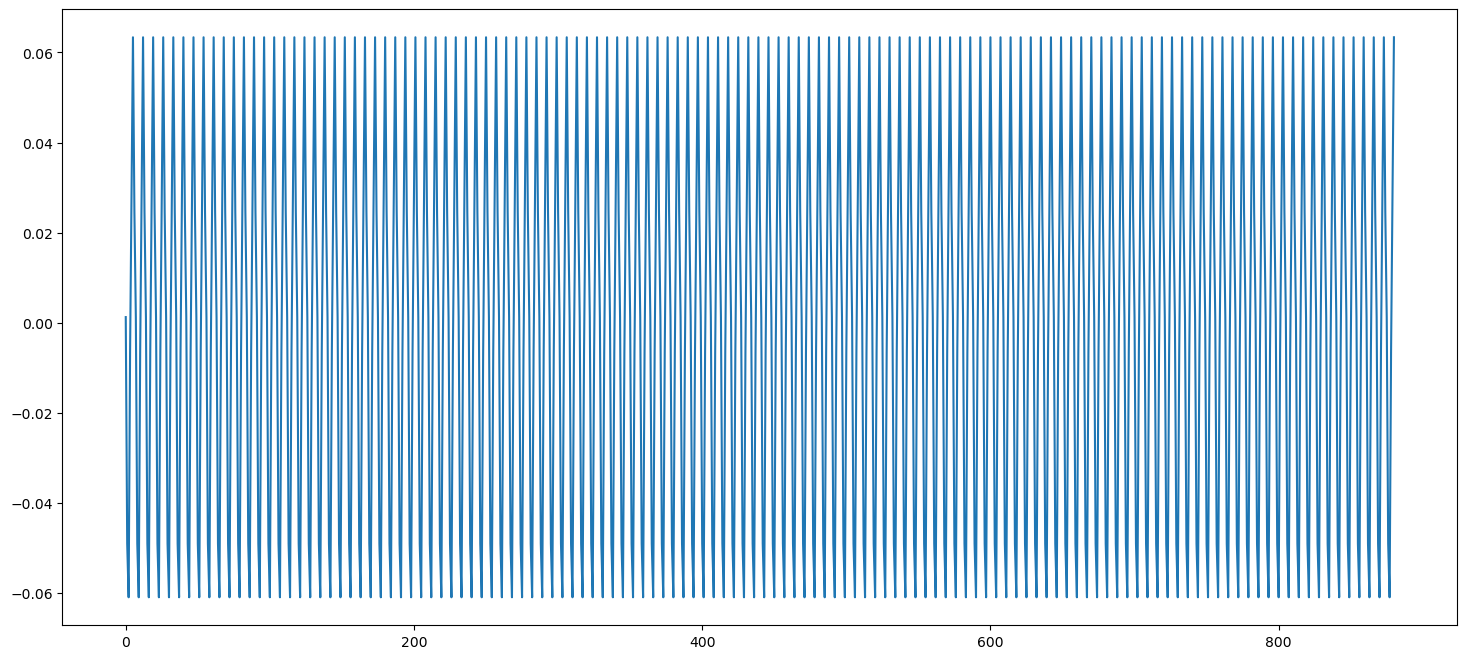

In [23]:
#the seasonal component of the decomposed model for diesel
result1.seasonal.plot()

__Interpretation:__  15 points(each 5)

1) What do you think about trendness of the data?    

   Ans: The trend shows both linear and non-linear movement over time, meaning that even though prices of these crude oil products increases over time, yet the trend fluctuated alot. Overall we say it actually has a linear movement. 
   
2) What do you think about seasonality of the data? 

   Ans: There is no significant difference in the prices of these crude oil products. That is to say that the difference in prices among seasons are negligible.
   
3) What about stationarity of the data? 

    Ans:  stationarity means that the statistical properties of a process generating a time series do not change over time, so since the time series changes over time we say it is a non stationary.

__Q6__ Plot Autocorrelation of the considered data! --5 points

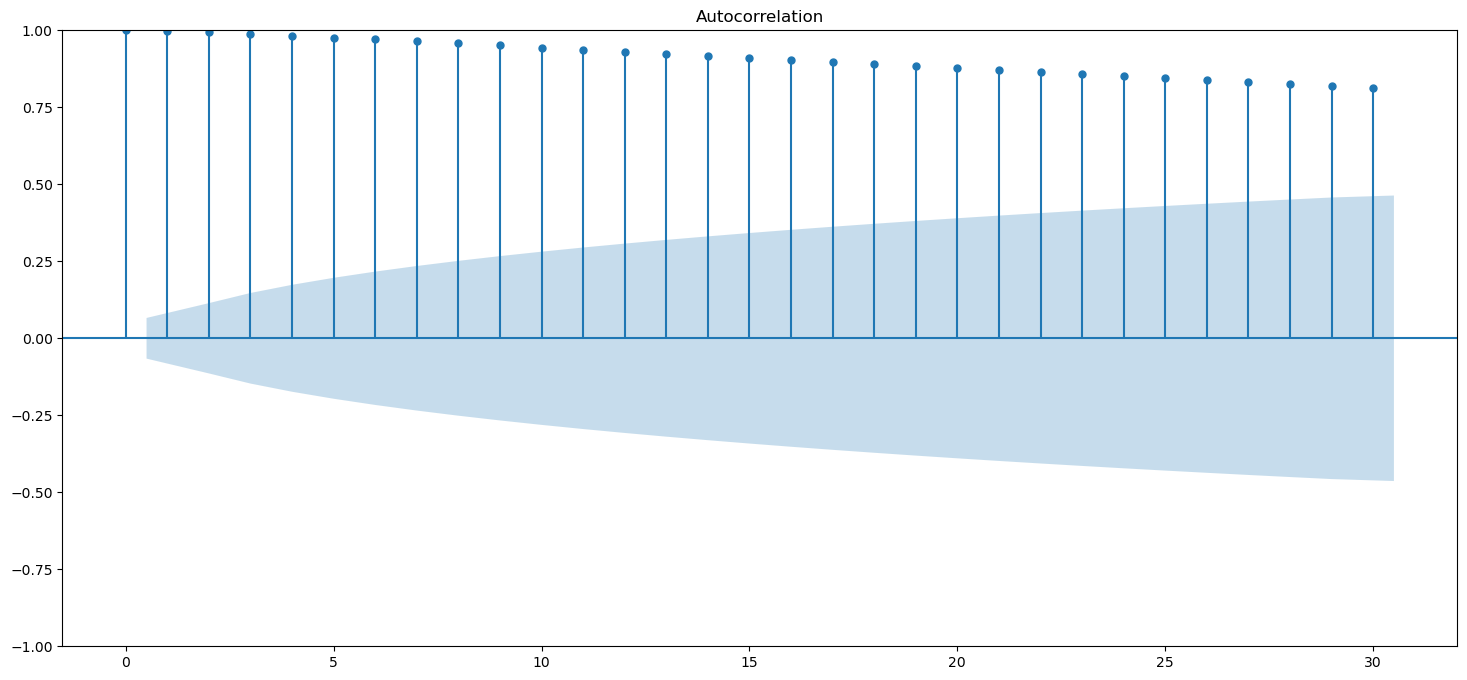

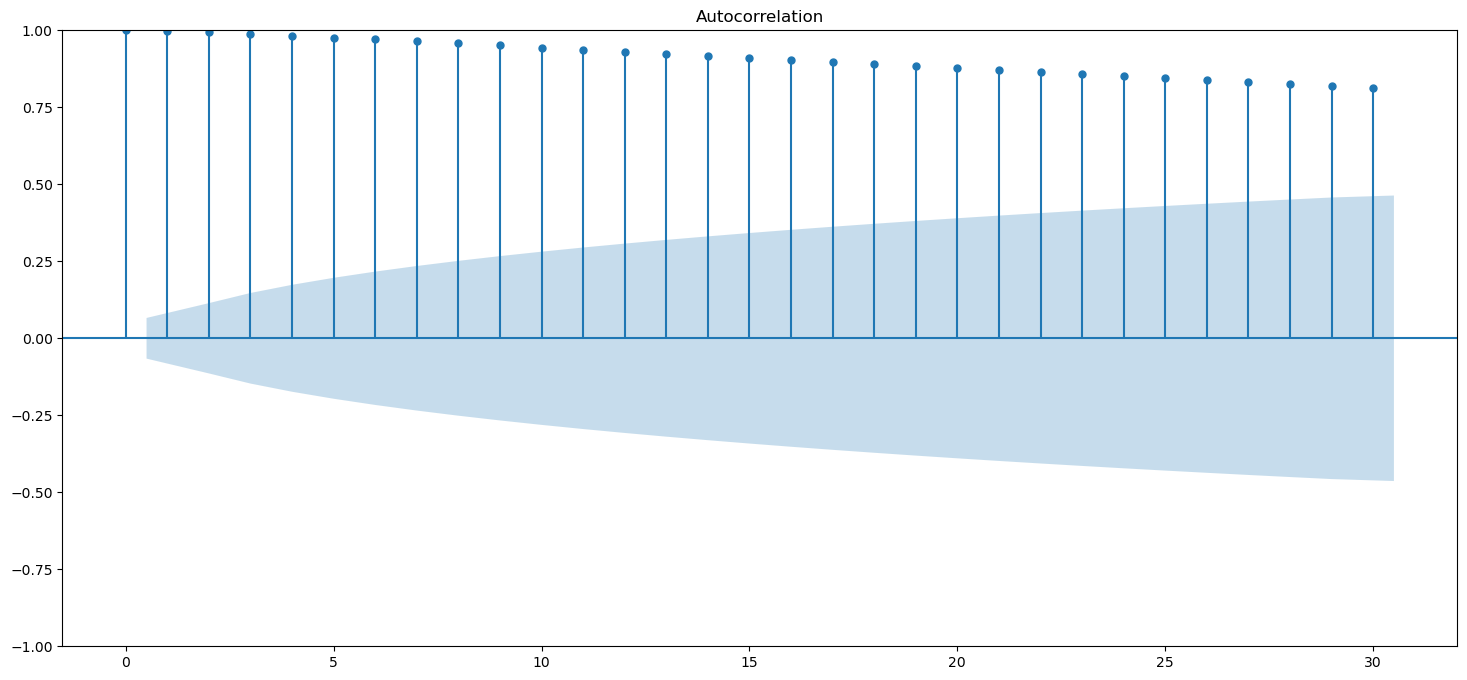

In [24]:
plot_acf(fuel_redefined['Diesel (USD)'])

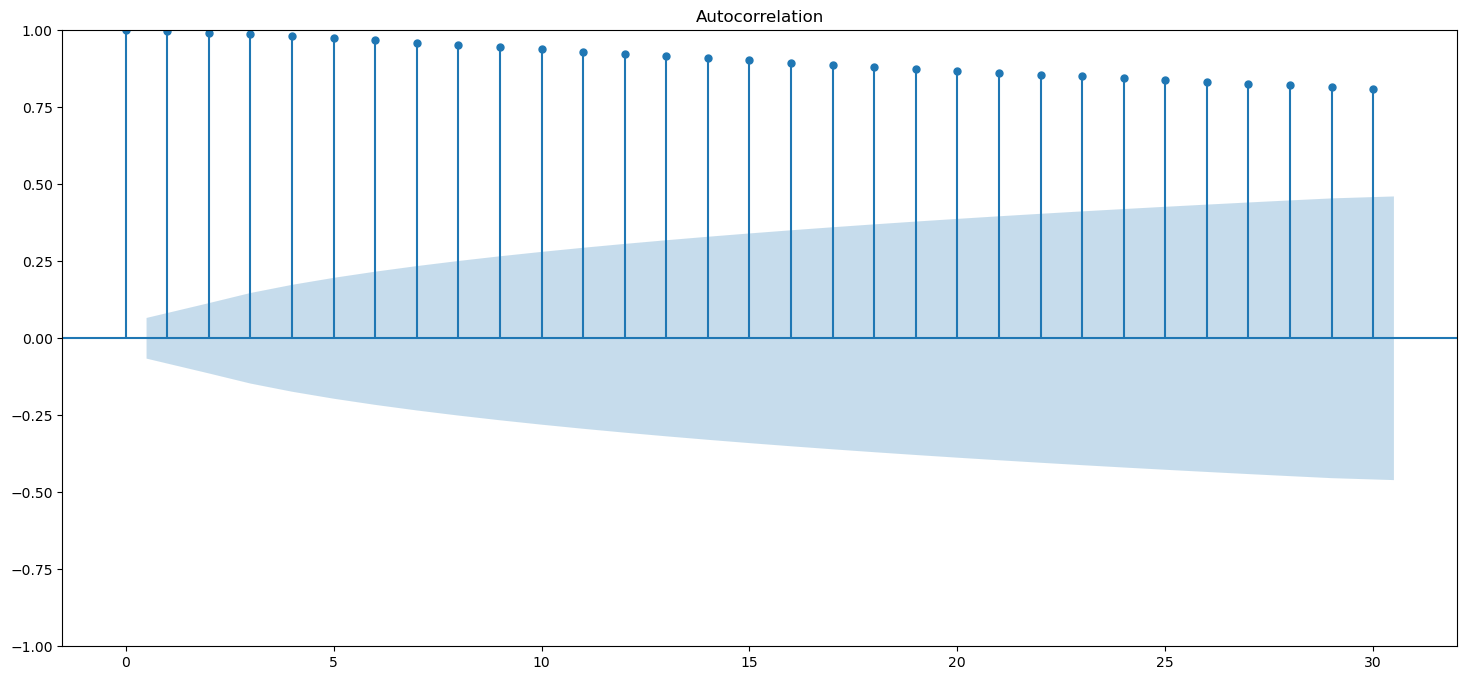

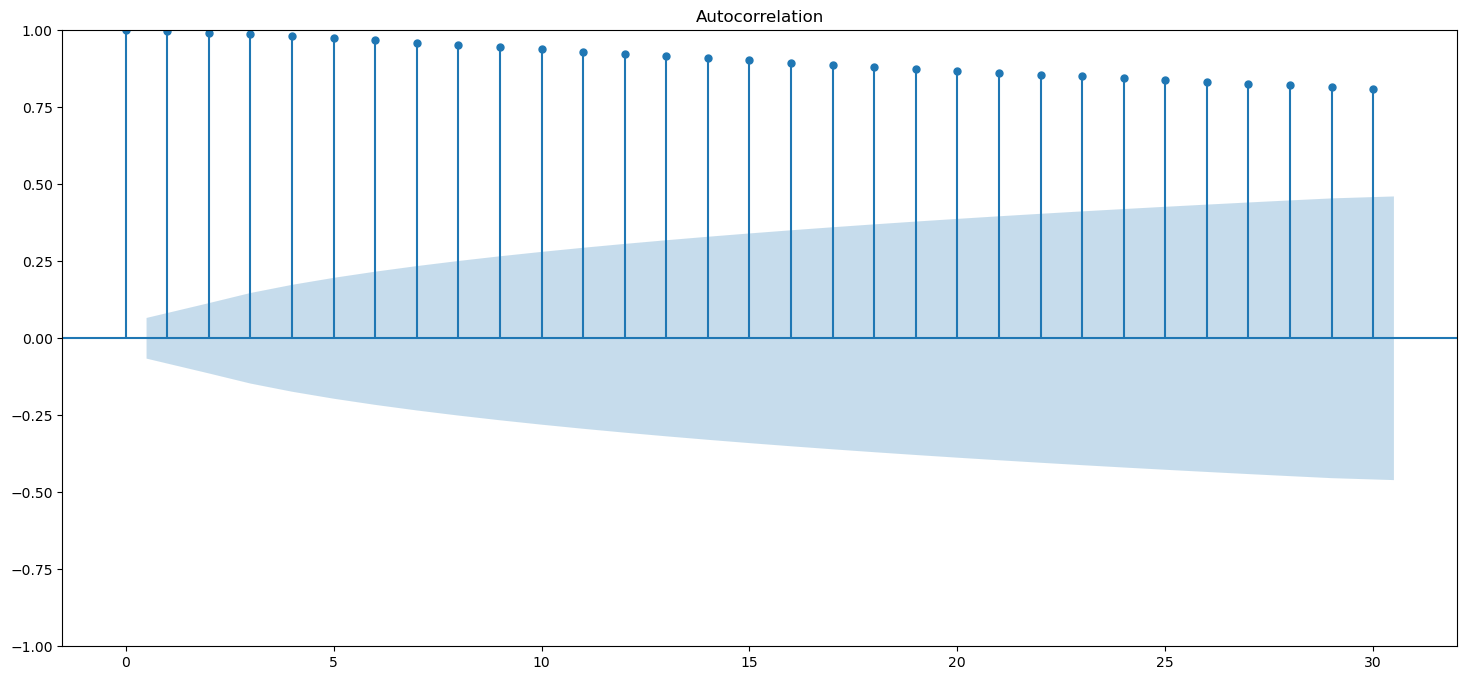

In [25]:
plot_acf(fuel_redefined['Petrol (USD)'])

__Interpretation:__  Interpret the obtained figure. What can you say about the data?  (5 points)

Autocorrelation measures a set of current values against a set of past values to see if they correlate. Hence from the above figures, we can see that there's a correlation in the sense that the increase of the lags increases the autocorrelation. 

__Q7__ Use the histograms to see the noise of the data? (5 points)

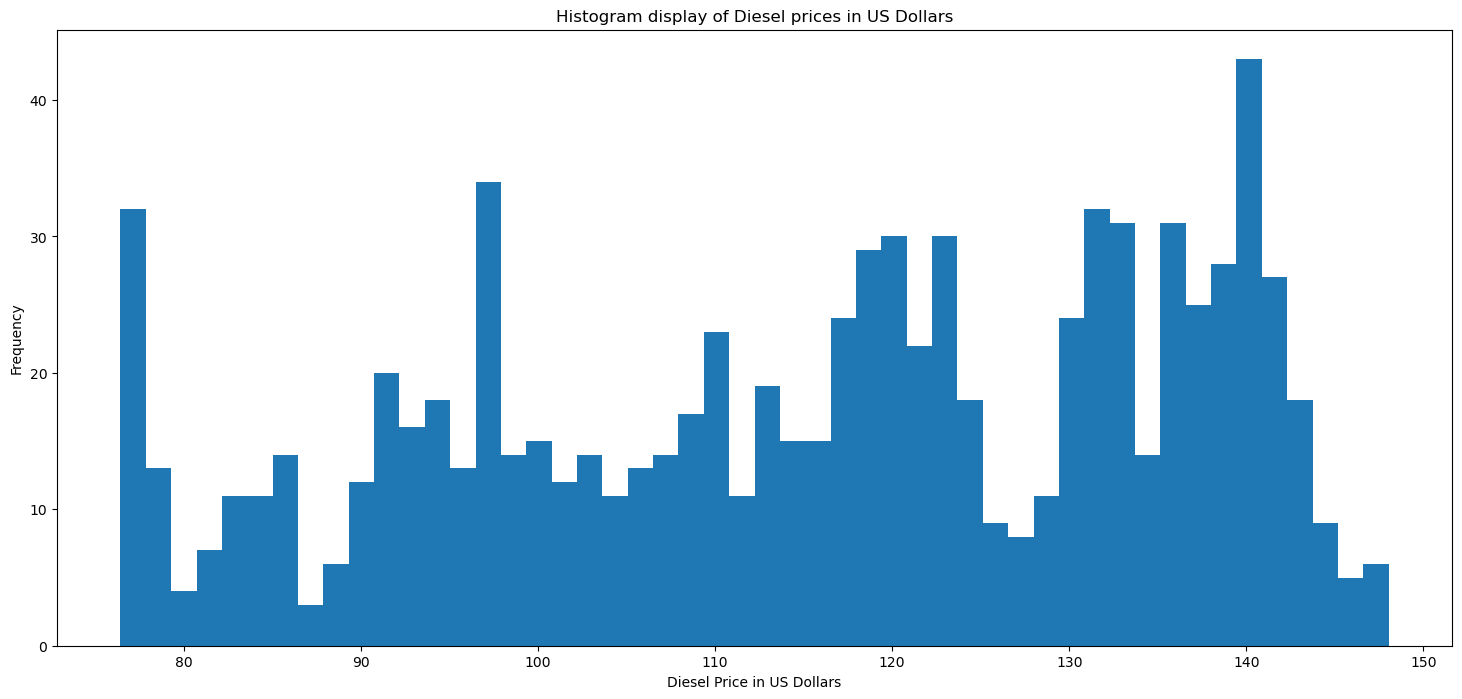

In [26]:
plt.hist(fuel_redefined['Diesel (USD)'], bins = 50)
plt.title('Histogram display of Diesel prices in US Dollars')
plt.xlabel('Diesel Price in US Dollars')
plt.ylabel('Frequency')
plt.show()

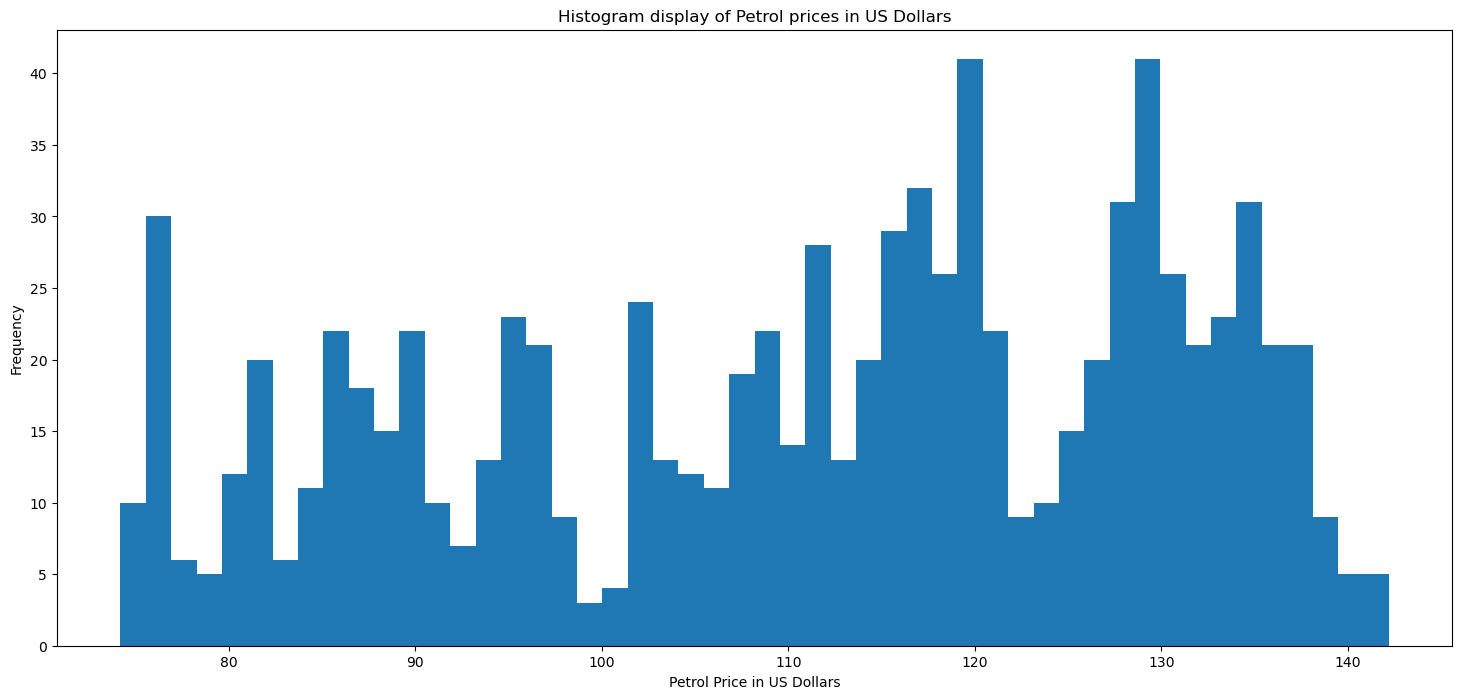

In [27]:
plt.hist(fuel_redefined['Petrol (USD)'], bins = 50)
plt.title('Histogram display of Petrol prices in US Dollars')
plt.xlabel('Petrol Price in US Dollars')
plt.ylabel('Frequency')
plt.show()

__Interpretation:__ Is it Noisy? Is it White Noise?  (10 points)

Ans: All the visualizations we have had shows that the data is very noisy.

__Q8__ To be more sure apply Augmented Dickey-Fuller test for the data? (5 points)

In [61]:
series = fuel_redefined.loc[:, 'Petrol (USD)'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.2613759734543817
n_lags: 0.18472762657497493
p-value: 0.18472762657497493
Critial Values:
   1%, -3.437836947046742
Critial Values:
   5%, -2.864845006291261
Critial Values:
   10%, -2.5685298249098225


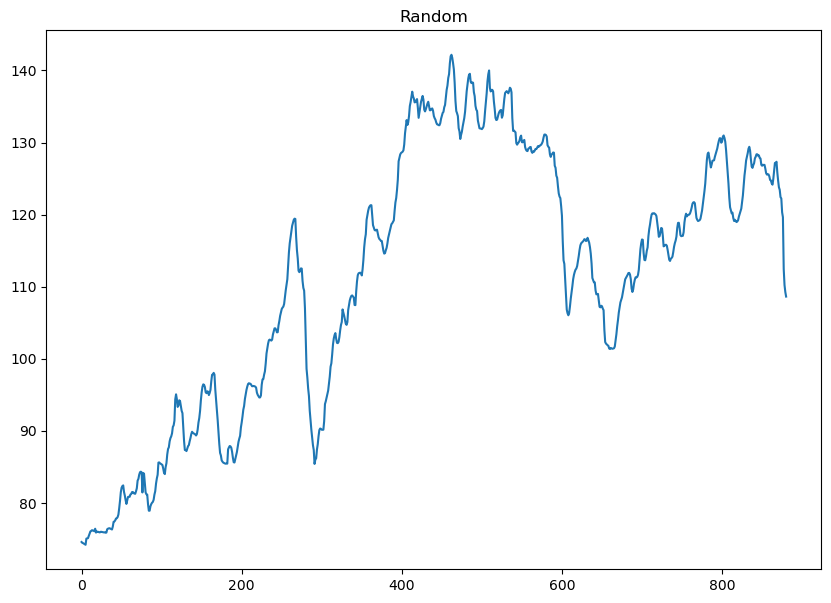

In [44]:
#visualizing the series
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');

__Interpretation:__ discuss the result, please! (10 points)

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [91]:
series = fuel_redefined.loc[:, 'Diesel (USD)'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.1587049758348
n_lags: 0.22157292570951664
p-value: 0.22157292570951664
Critial Values:
   1%, -3.437836947046742
Critial Values:
   5%, -2.864845006291261
Critial Values:
   10%, -2.5685298249098225


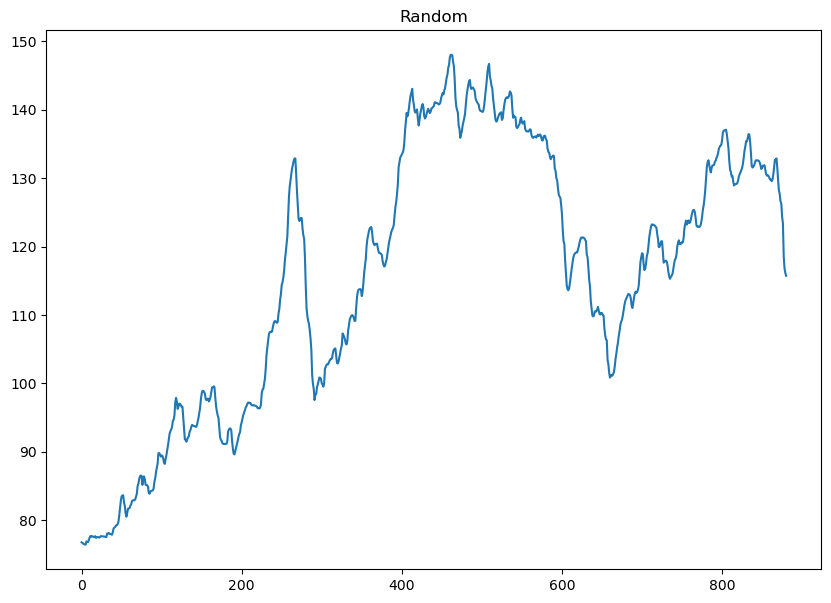

In [92]:
#visualizing the series
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary. As clearly seen from the diesel column, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

***

### EXTRA POINTS -30 points 

__HELP__ Utilize the [difference strategy!](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/) if you need (for anybody who says the data is non-stationary) Otherwise, go the the model step! (10 points)

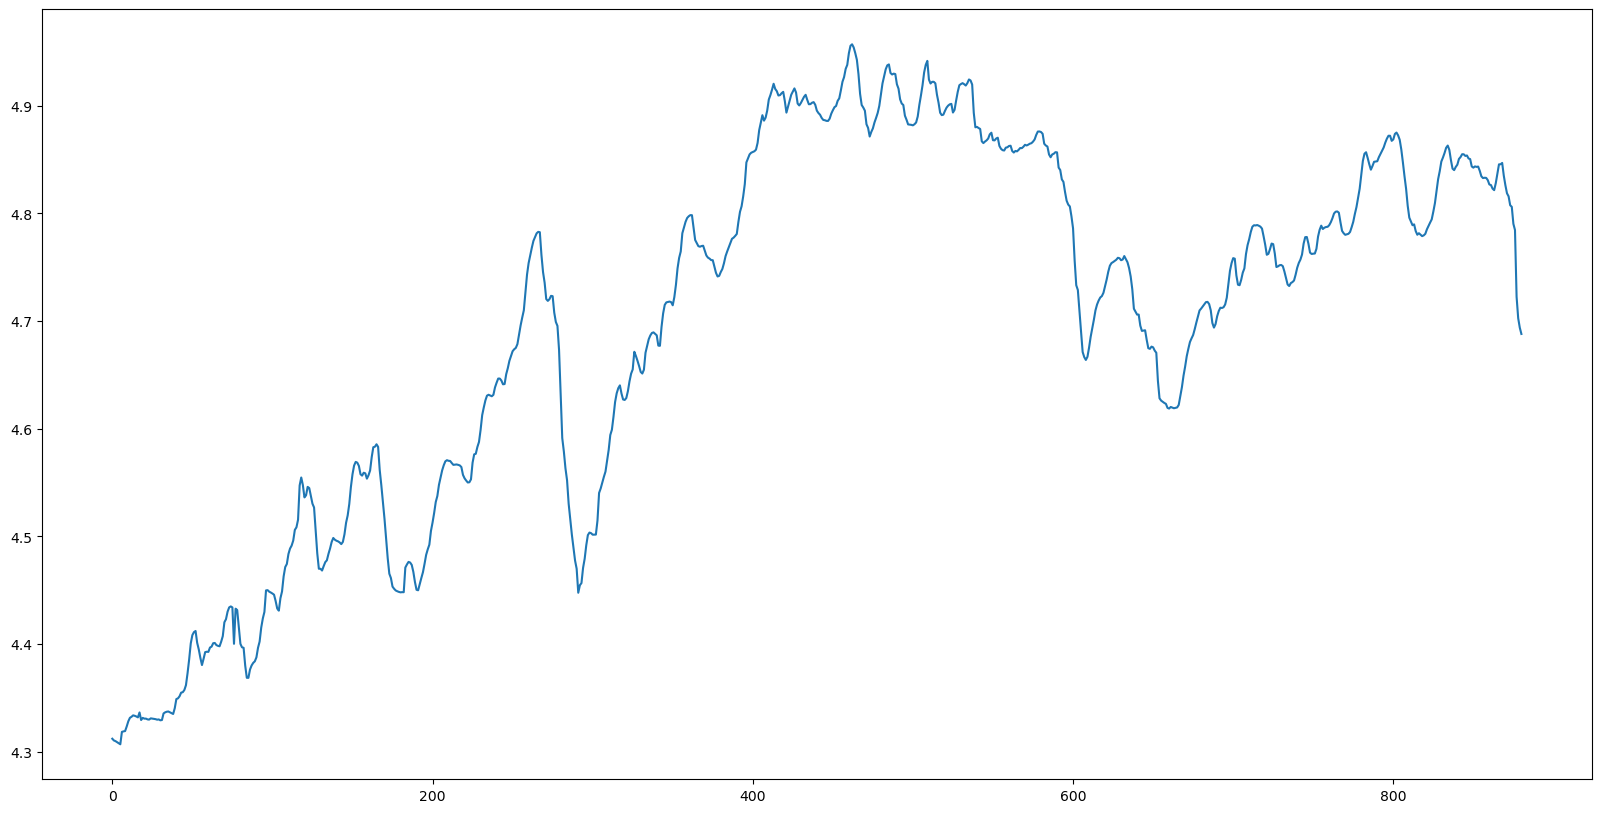

In [81]:
plt.figure(figsize=(20,10))
fuel_log=np.log(fuel_redefined['Petrol (USD)'])
plt.plot(fuel_log)

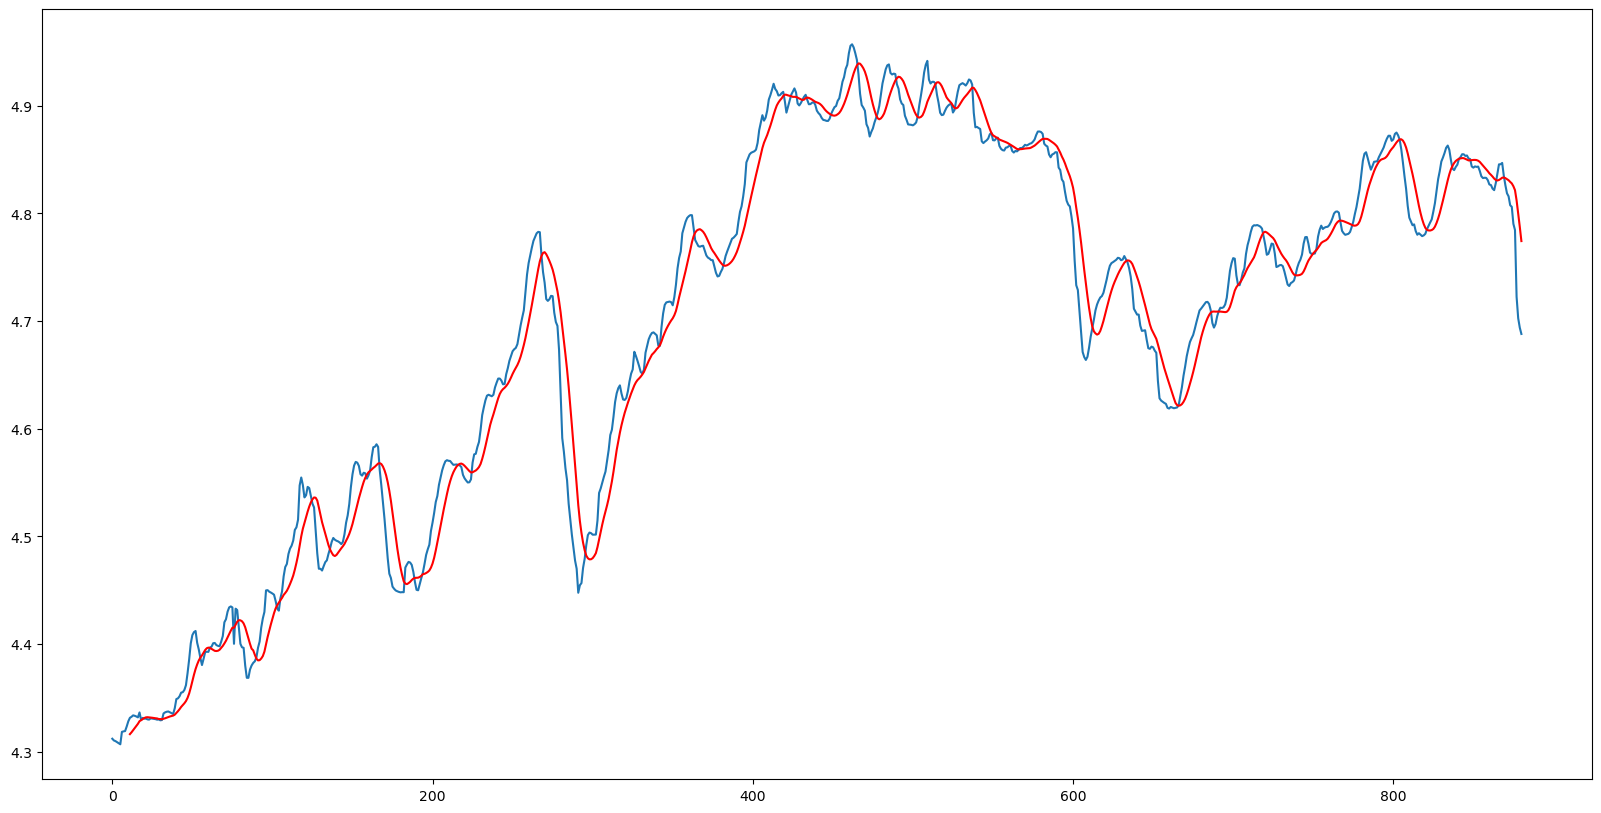

In [82]:
plt.figure(figsize=(20,10))
MAvg=fuel_log.rolling(window=12).mean()
MStd=fuel_log.rolling(window=12).std()
plt.plot(fuel_log)
plt.plot(MAvg, color='red')

In [83]:
#Applying differencing on our series and plotting the results
fuel_redefined['Petrol_diff'] = fuel_redefined['Petrol (USD)'] - fuel_redefined['Petrol (USD)'].shift(1)
fuel_clean = fuel_redefined['Petrol_diff'].dropna()
fuel_clean

C:\Users\HP\AppData\Local\Temp\ipykernel_9588\1175989558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_redefined['Petrol_diff'] = fuel_redefined['Petrol (USD)'] - fuel_redefined['Petrol (USD)'].shift(1)


1     -0.121141
2     -0.045577
3     -0.071145
4     -0.068684
5     -0.077160
         ...   
876   -0.683665
877   -7.191795
878   -2.217912
879   -0.968978
880   -0.633072
Name: Petrol_diff, Length: 880, dtype: float64

In [84]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(fuel_clean, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -9.293016e+00
p-value                 1.165987e-15
Lags Used               3.000000e+00
No. of Obs              8.760000e+02
Critical Value (1%)    -3.437837e+00
Critical Value (5%)    -2.864845e+00
Critical Value (10%)   -2.568530e+00
dtype: float64


If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). From the above test we can see that TEST STATISTIC < CRITICAL VALUE, hence, here we say that the time series is in fact stationary.

In [85]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

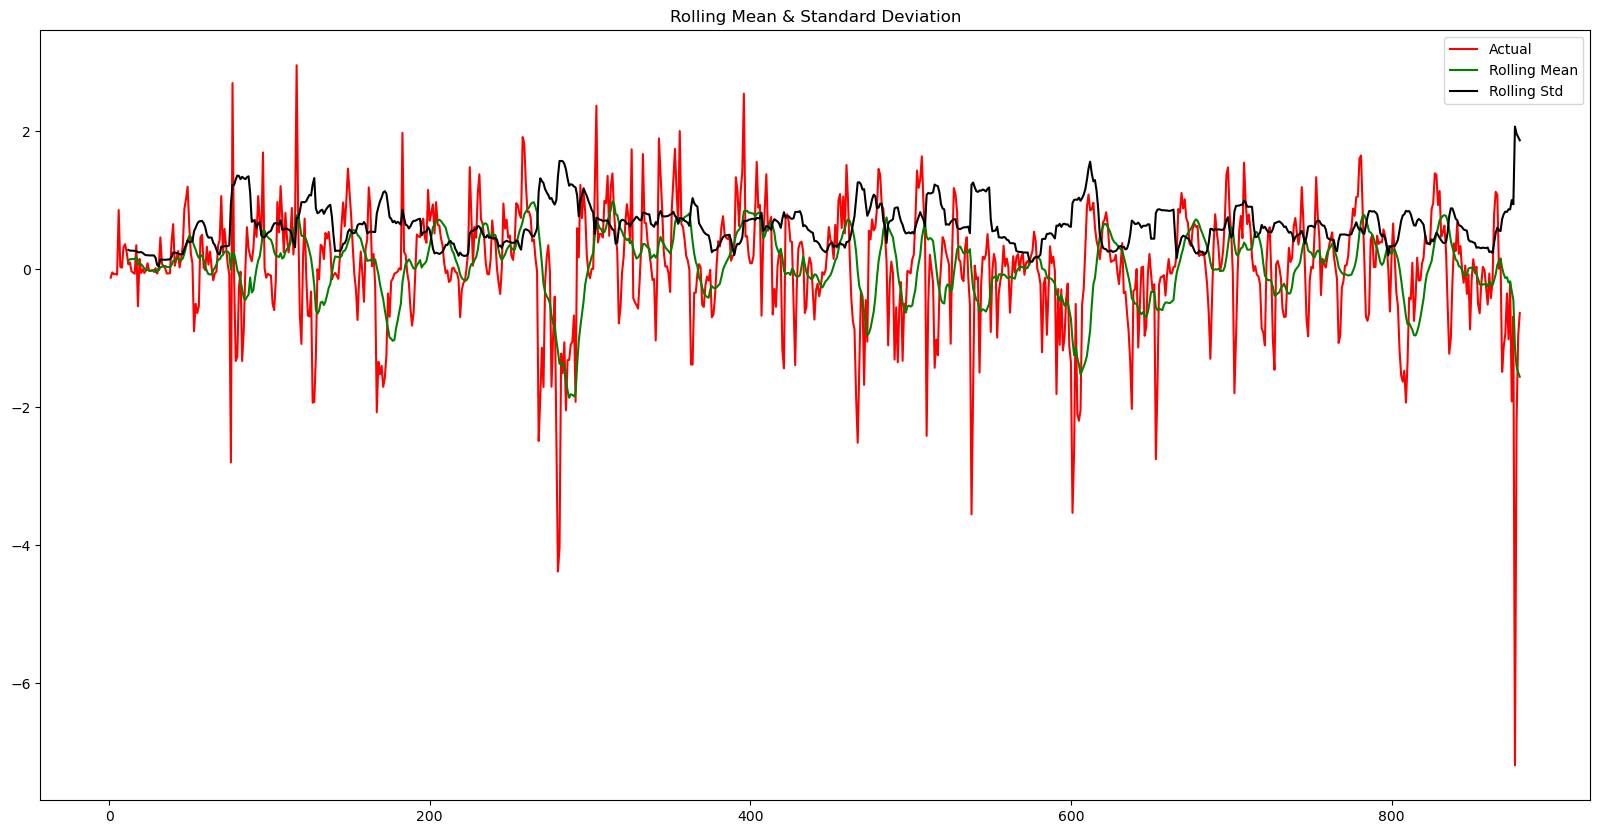

In [86]:
stationarity(fuel_clean)

# Applying same line of codes to Diesel column

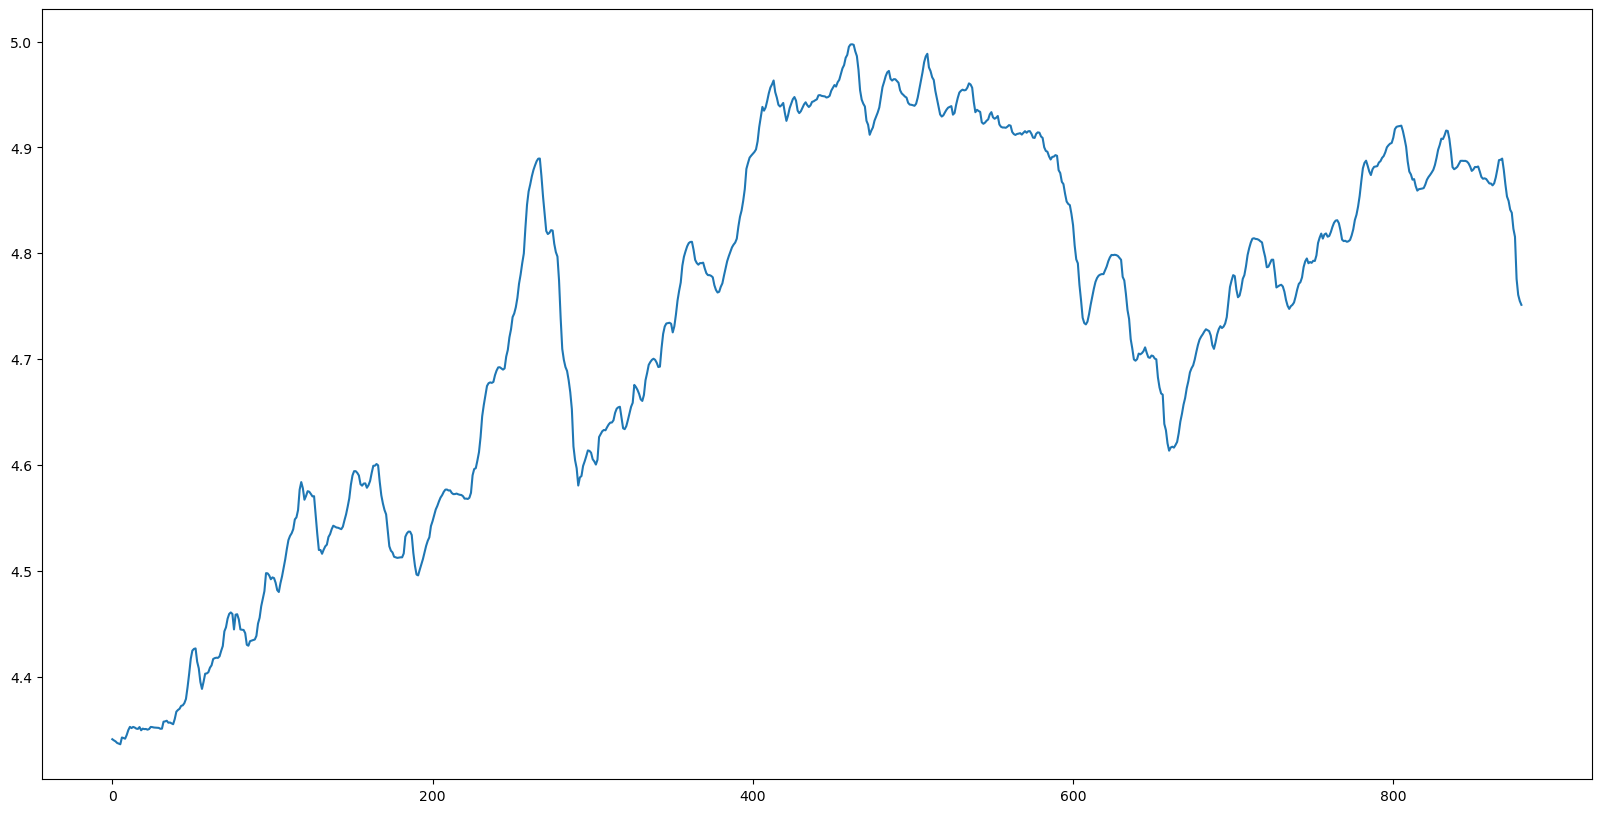

In [88]:
plt.figure(figsize=(20,10))
fuel_log1=np.log(fuel_redefined['Diesel (USD)'])
plt.plot(fuel_log1)

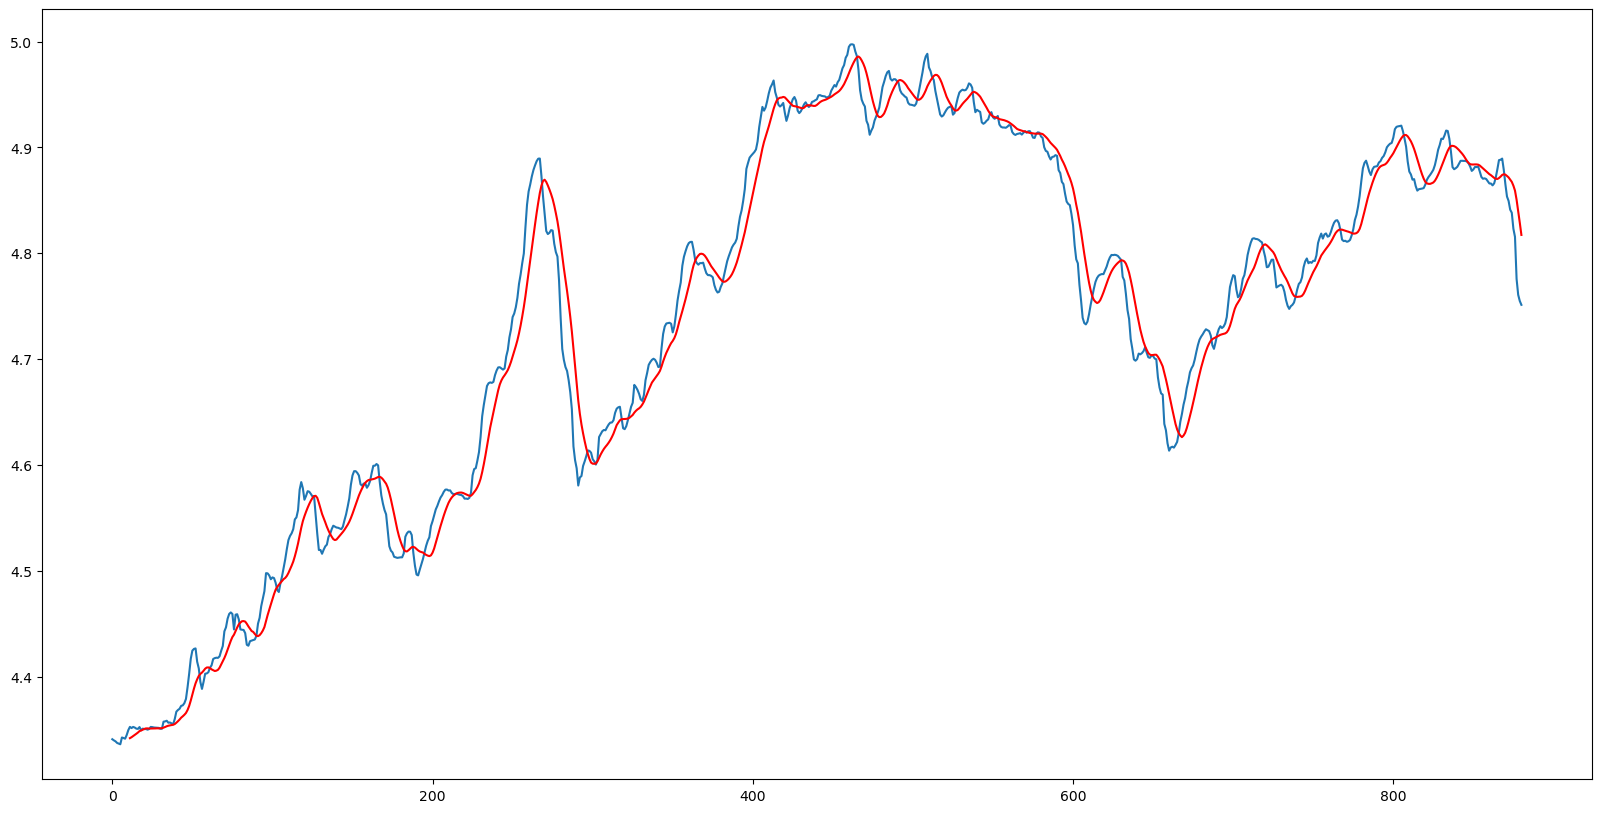

In [89]:
plt.figure(figsize=(20,10))
MAvg=fuel_log1.rolling(window=12).mean()
MStd=fuel_log1.rolling(window=12).std()
plt.plot(fuel_log1)
plt.plot(MAvg, color='red')

In [90]:
#Applying differencing on our series and plotting the results
fuel_redefined['Diesel_diff'] = fuel_redefined['Diesel (USD)'] - fuel_redefined['Diesel (USD)'].shift(1)
Diesel_clean = fuel_redefined['Diesel_diff'].dropna()
Diesel_clean

C:\Users\HP\AppData\Local\Temp\ipykernel_9588\1665450709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_redefined['Diesel_diff'] = fuel_redefined['Diesel (USD)'] - fuel_redefined['Diesel (USD)'].shift(1)


1     -0.084340
2     -0.068508
3     -0.115286
4     -0.047884
5     -0.049256
         ...   
876   -0.953989
877   -4.811487
878   -1.764644
879   -0.682542
880   -0.418239
Name: Diesel_diff, Length: 880, dtype: float64

In [93]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(Diesel_clean, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -9.668275e+00
p-value                 1.297453e-16
Lags Used               3.000000e+00
No. of Obs              8.760000e+02
Critical Value (1%)    -3.437837e+00
Critical Value (5%)    -2.864845e+00
Critical Value (10%)   -2.568530e+00
dtype: float64


If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). From the above test we can see that TEST STATISTIC < CRITICAL VALUE for the diesel column, hence, here we say that the time series is in fact stationary.

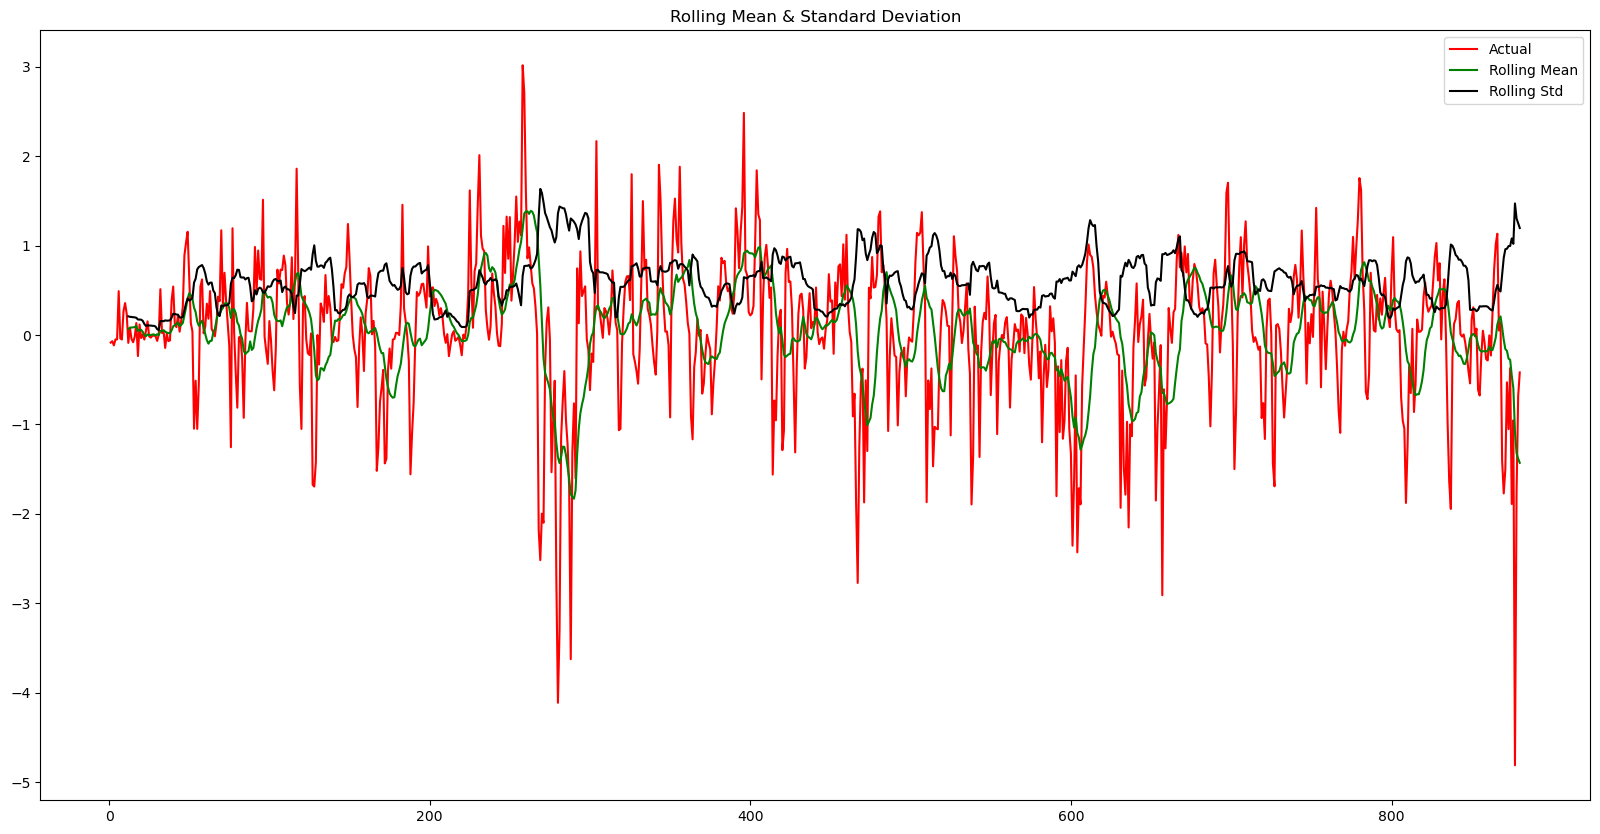

In [94]:
stationarity(Diesel_clean)

__Q9__ Use the arima model to predict the the price of petrol? (20 points)

Hint: You can use [Strategy in Github](https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis/blob/master/Air_Passenger_with_explanations.ipynb)

C:\Users\HP\AppData\Local\Temp\ipykernel_9588\4065347013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_redefined['Petrol_diff'] = fuel_redefined['Petrol (USD)'] - fuel_redefined['Petrol (USD)'].shift(1)


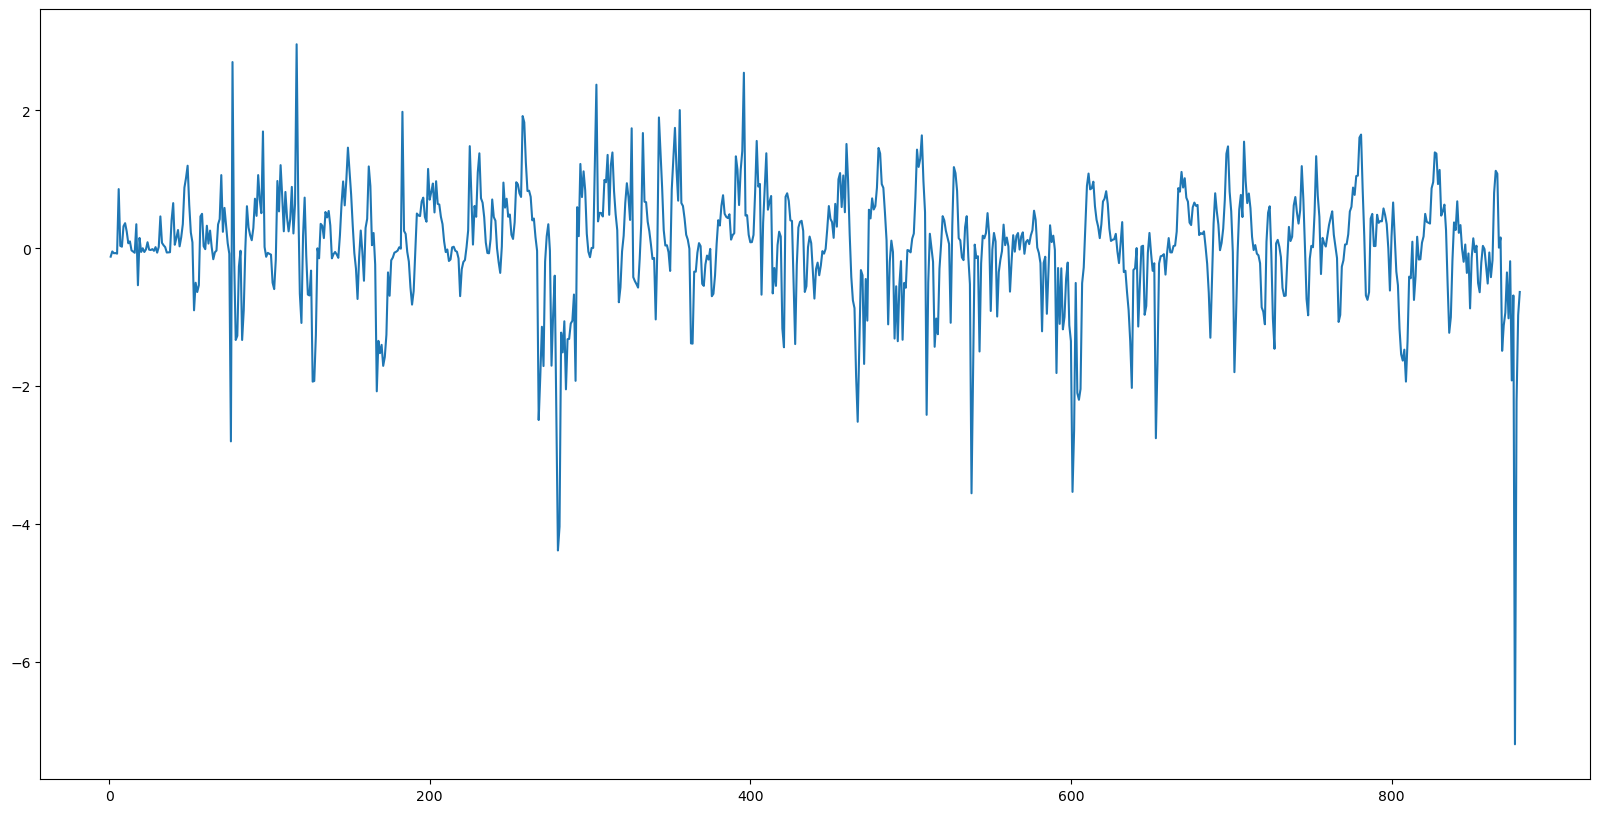

In [99]:
plt.figure(figsize=(20,10))
fuel_redefined['Petrol_diff'] = fuel_redefined['Petrol (USD)'] - fuel_redefined['Petrol (USD)'].shift(1)
plt.plot(fuel_redefined['Petrol_diff'])

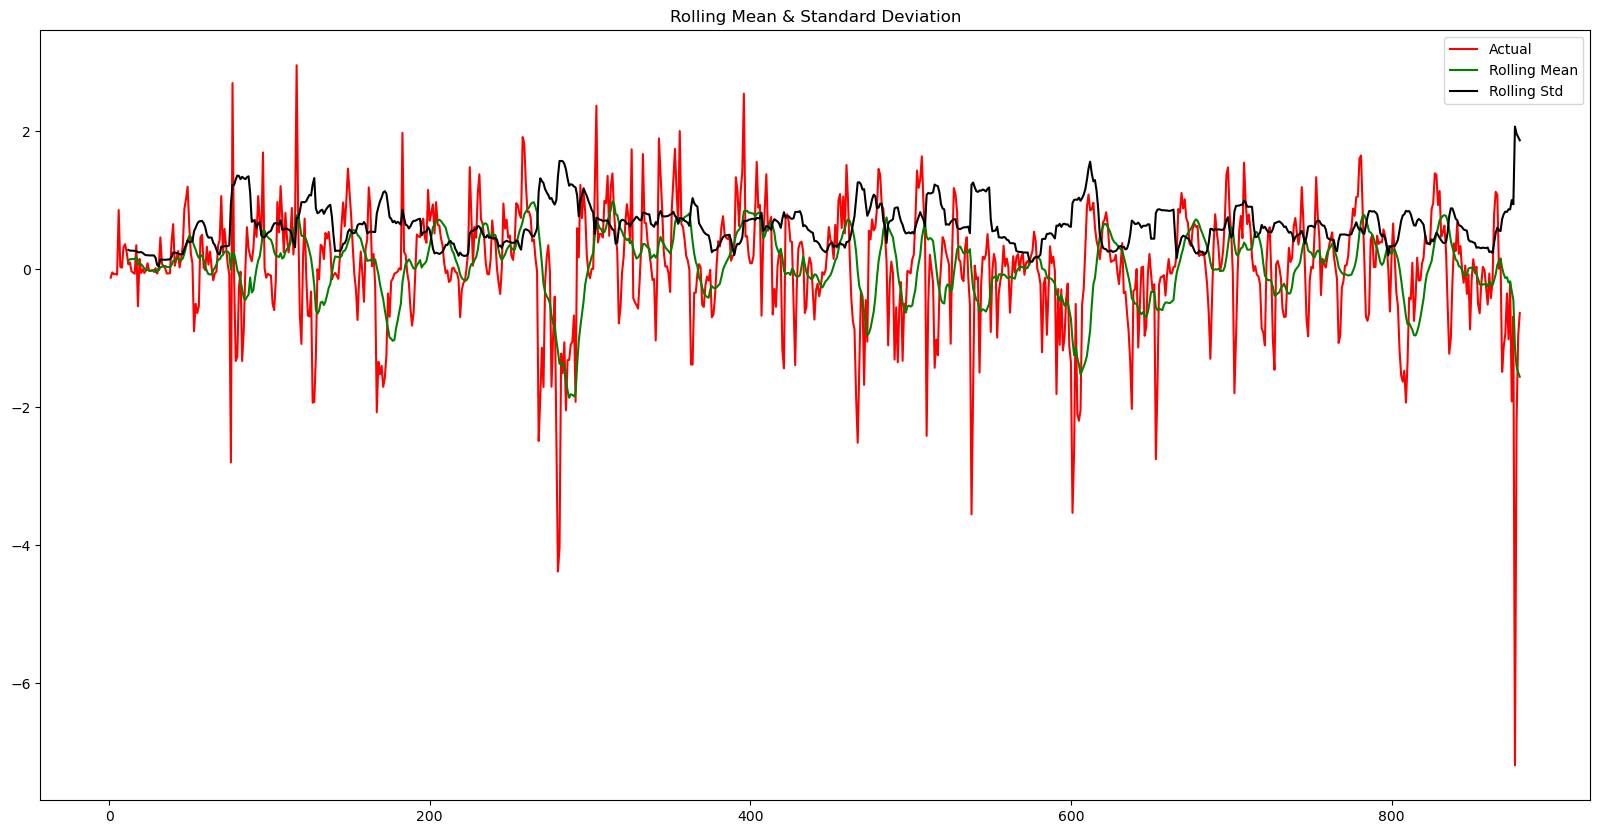

In [100]:
fuel_clean = fuel_redefined['Petrol_diff'].dropna()
stationarity(fuel_clean)

In [97]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(fuel_redefined['Petrol (USD)'], order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(fuel_redefined['Petrol_diff'])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-fuel_redefined['Petrol_diff']['Petrol (USD)'])**2))
print('plotting ARIMA model')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


<Figure size 2000x1000 with 0 Axes>

Optional: forecast the following year estimation!

Prof. i couldn't rectify the error message above to continue